<a href="https://colab.research.google.com/github/Pratik94229/Time-Series/blob/main/Airline_Passenger_Prediction_using_FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
#Data handling and manipulation
import pandas as pd
import numpy as np

#For time series analysis
import io, os, sys, setuptools, tokenize

#For creating model
from prophet import Prophet

#For plotting changeplot
from prophet.plot import add_changepoints_to_plot

In [70]:
#Downloading dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv


--2023-05-11 13:11:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-11 13:11:03 (19.7 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [71]:
#loading dataset
df = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)


In [72]:
#First look
df.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [73]:
#converting passengers column and index column as required in prophet model
df.columns=['y']

df['ds']=df.index

In [74]:
#changed dataset
df.head(3)

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01


In [75]:
#checking ending of dataset
df.tail()

,y,ds
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [76]:
#creating model
m=Prophet()

#fitting model on dataframe
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/n2s0jd5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/g8y5g48s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44443', 'data', 'file=/tmp/tmp2_tv1d3q/n2s0jd5_.json', 'init=/tmp/tmp2_tv1d3q/g8y5g48s.json', 'output', 'file=/tmp/tmp2_tv1d3q/prophet_modelnuyy7hyy/prophet_model-20230511131103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
#Creating future dates for prediction
future = m.make_future_dataframe(periods=12,freq="MS")
     

In [78]:
#checking ending data in future dataframe
future.tail()

,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [79]:
#forecasting on future data
forecast=m.predict(future)

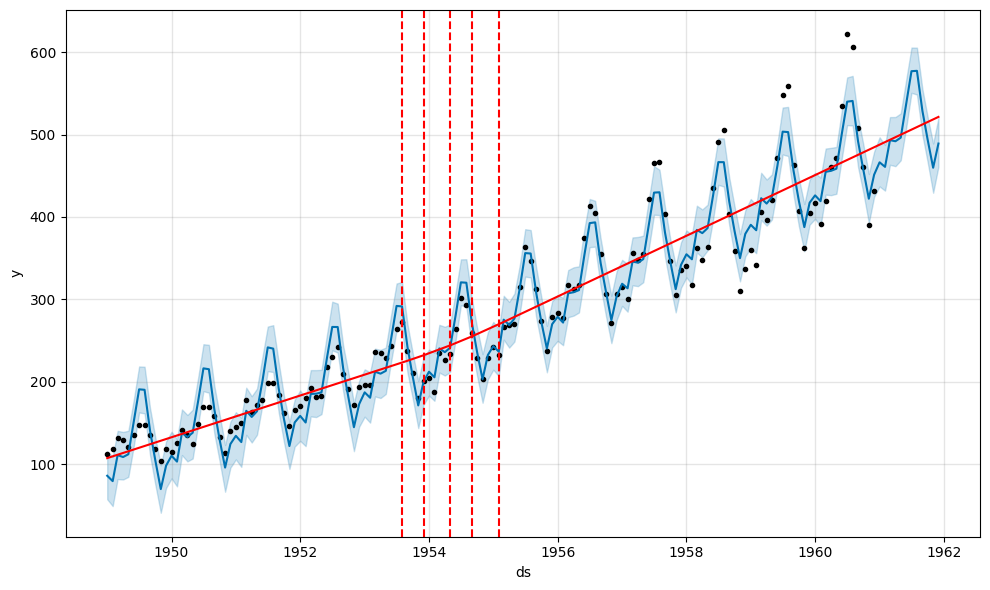

In [80]:
#plotting predicted value
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

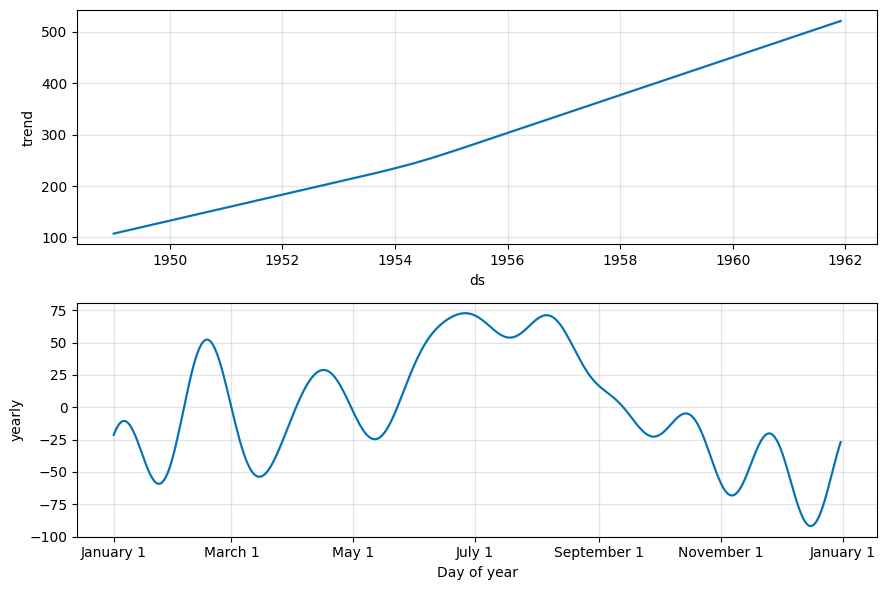

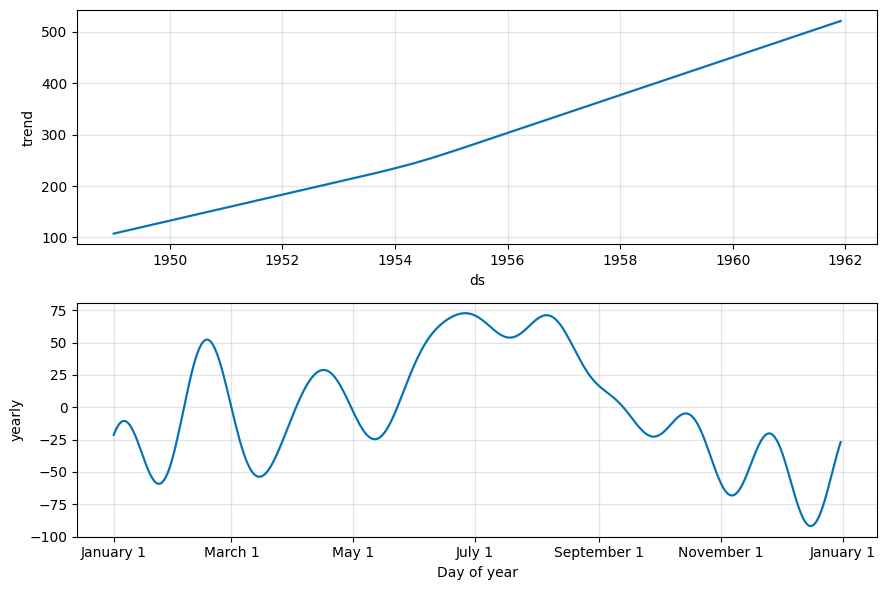

In [81]:
#plotting components of model
m.plot_components(forecast)

In [82]:
#creating model with seasonality as multiplicative(default=additive)
m1=Prophet(seasonality_mode='multiplicative')

#fitting model
m1.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/vtxhtvg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/09duliqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49973', 'data', 'file=/tmp/tmp2_tv1d3q/vtxhtvg5.json', 'init=/tmp/tmp2_tv1d3q/09duliqg.json', 'output', 'file=/tmp/tmp2_tv1d3q/prophet_model3sl5odvo/prophet_model-20230511131105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
#Creating future dates for prediction
future1 = m1.make_future_dataframe(periods=12,freq="MS")
     

In [84]:
#forecasting on future data
forecast1=m1.predict(future1)

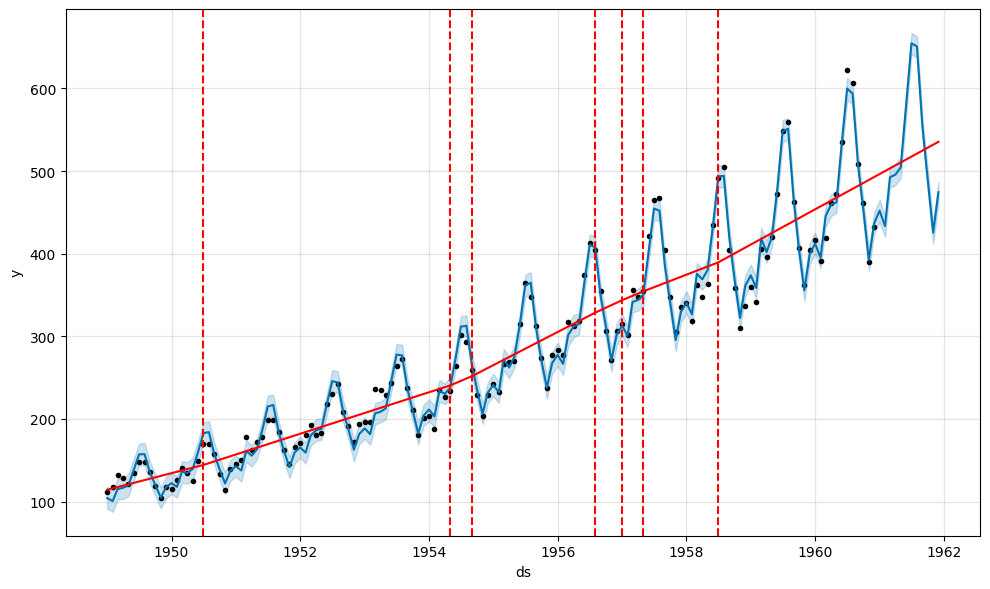

In [85]:
#plotting predicted value
fig=m1.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),m1,forecast1)

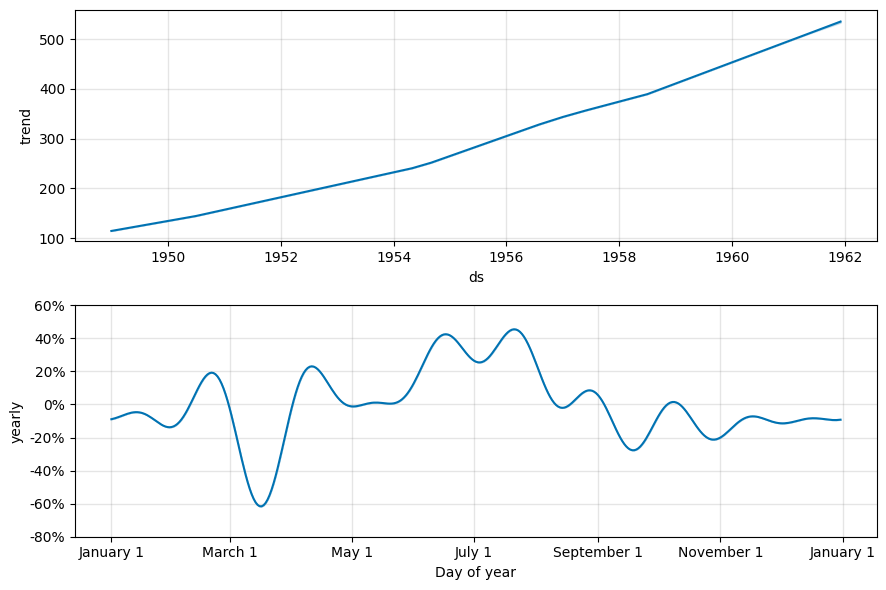

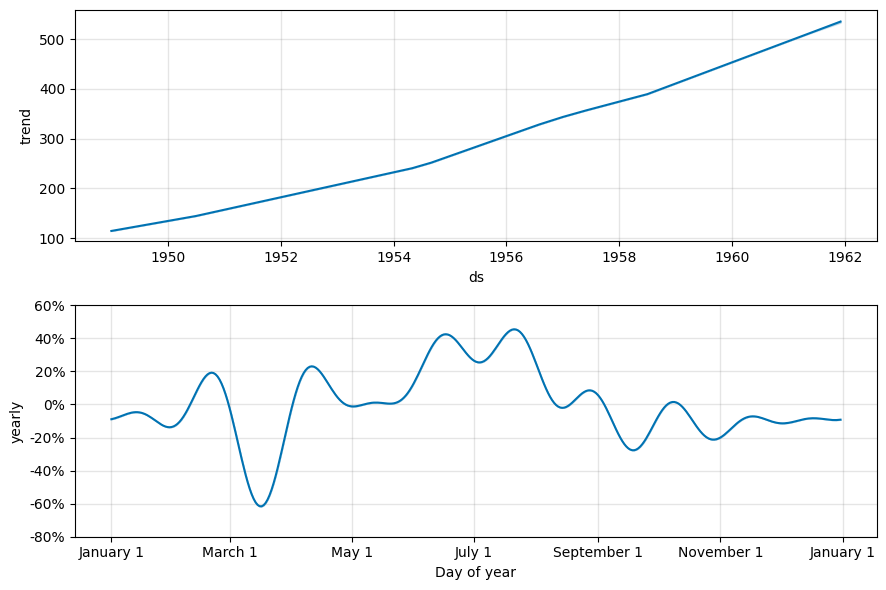

In [86]:
#plotting model components
m1.plot_components(forecast1)

##Implementing model after taking log of passenger values.

In [87]:
#creating copy of dataset
logdf=df.copy()

In [88]:
#taking log of passenger values in dataset
logdf['y']=np.log(logdf['y'])

In [89]:
#creating instance of model
m2=Prophet()

#fitting the model
m2.fit(logdf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/wyligoeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/5sq54it2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97863', 'data', 'file=/tmp/tmp2_tv1d3q/wyligoeh.json', 'init=/tmp/tmp2_tv1d3q/5sq54it2.json', 'output', 'file=/tmp/tmp2_tv1d3q/prophet_modelnsjg06ff/prophet_model-20230511131107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
#Creating future dates for prediction
future = m2.make_future_dataframe(periods=12,freq="MS")    

In [91]:
#forecasting on future dates
forecast=m2.predict(future)

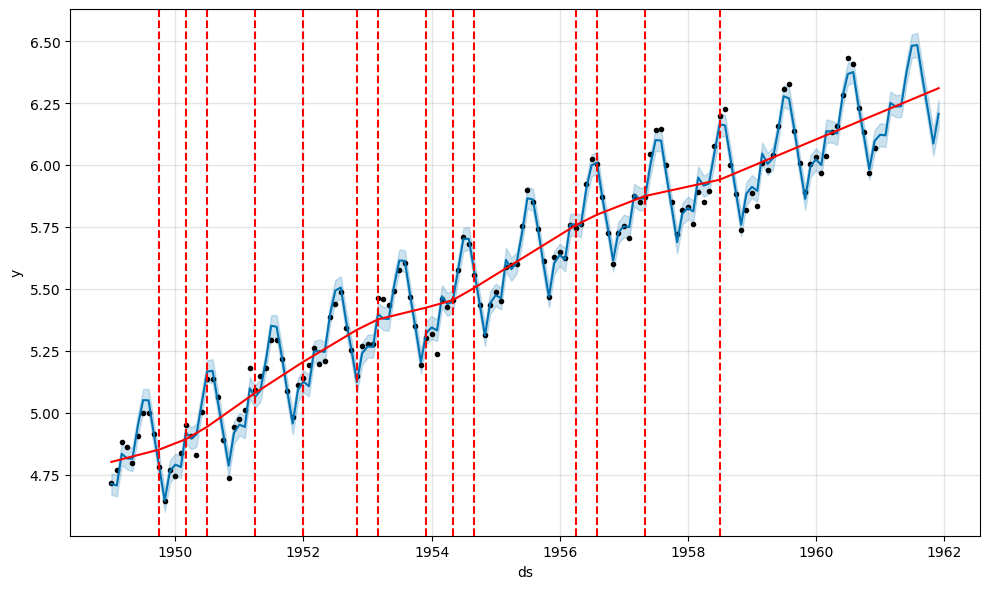

In [92]:
#plotting change points
fig=m2.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m2,forecast)

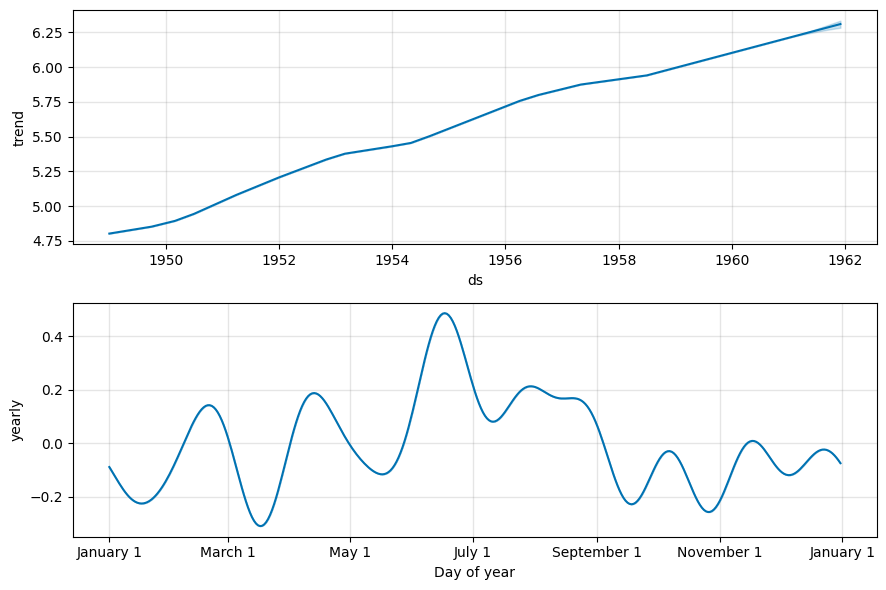

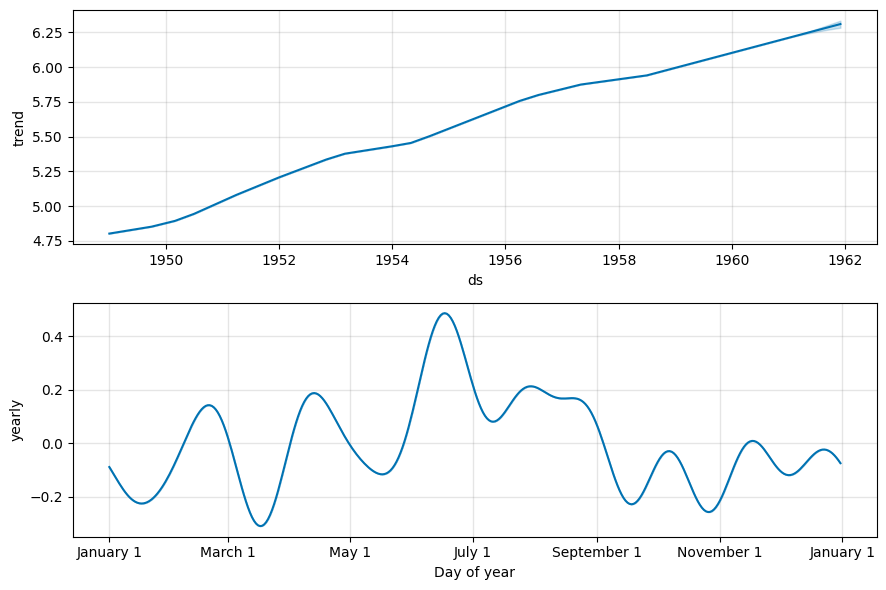

In [93]:
#plotting model components
m2.plot_components(forecast)

##Creating Random Outliers

In [94]:
df.loc['1955-01-01','y']=600
df.loc['1957-06-01','y']=1

<Axes: xlabel='Month'>

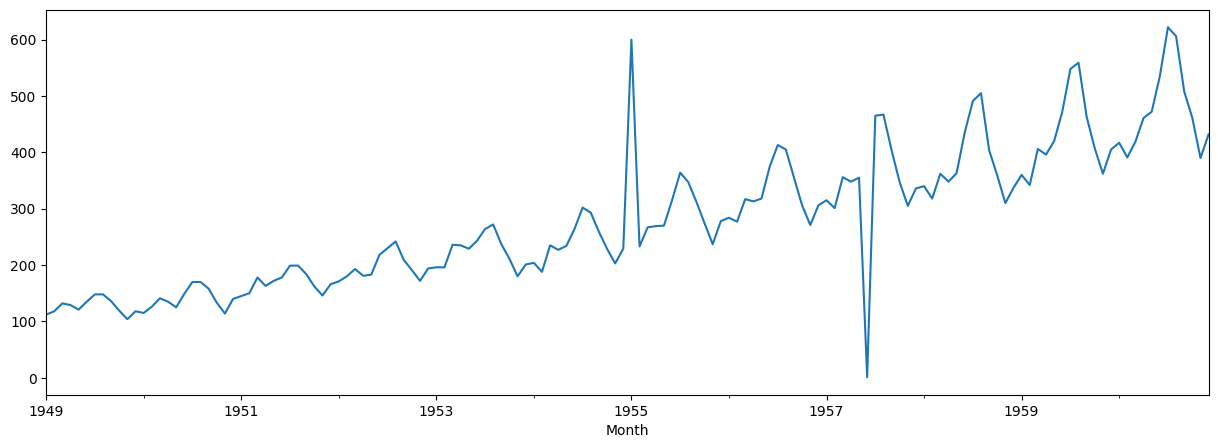

In [95]:
#plotting y 
df['y'].plot(figsize=(15,5))

In [96]:
#creating model instance
m3=Prophet()

#fitting the model
m3.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/knykeqma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/6jca20b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28622', 'data', 'file=/tmp/tmp2_tv1d3q/knykeqma.json', 'init=/tmp/tmp2_tv1d3q/6jca20b3.json', 'output', 'file=/tmp/tmp2_tv1d3q/prophet_modelynnur6k0/prophet_model-20230511131108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
#Creating future dates for prediction
future = m3.make_future_dataframe(periods=12,freq="MS")
     

In [98]:
#predicting on future dataset 
forecast=m3.predict(future)

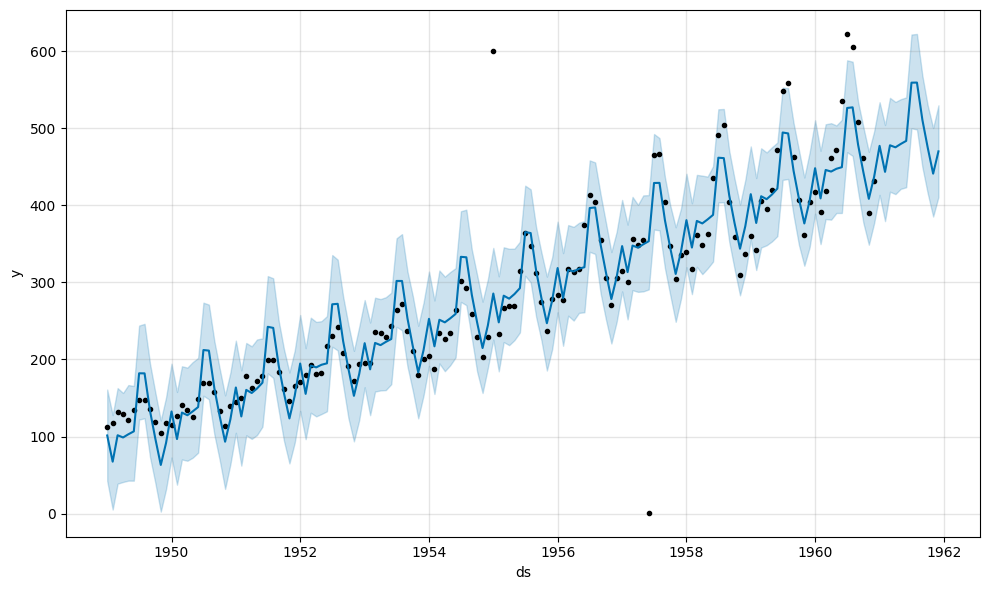

In [99]:
#plotting forecasted value
fig=m3.plot(forecast)


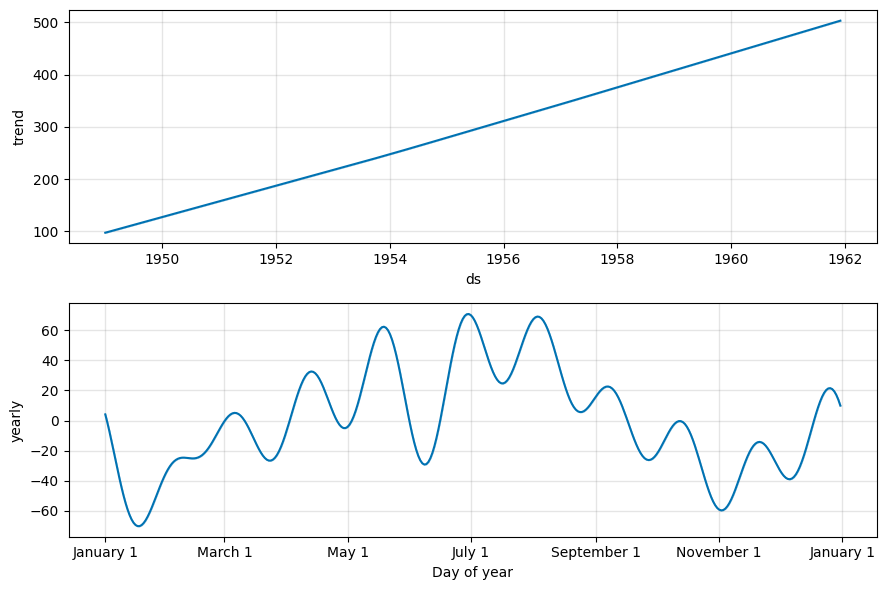

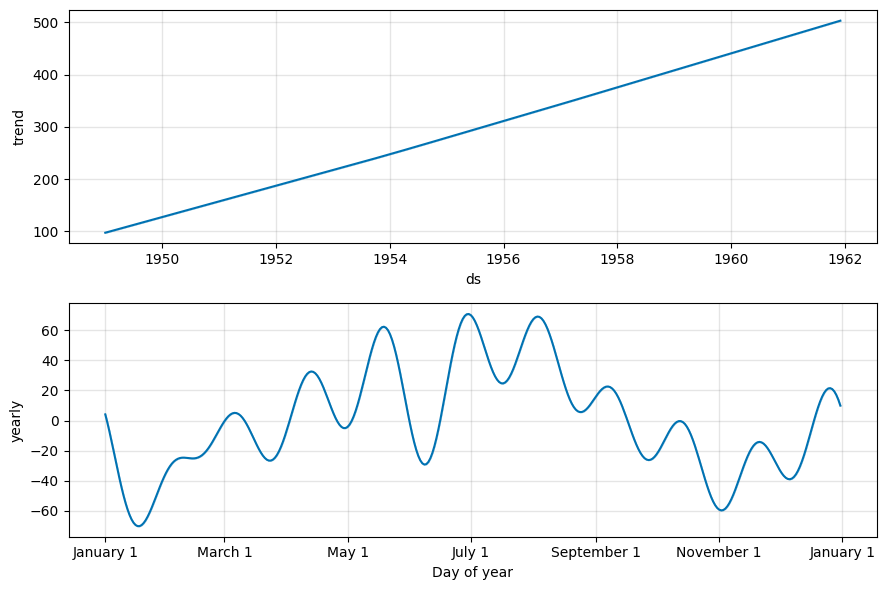

In [100]:
#plotting model components
m3.plot_components(forecast)

##Handing outlier

In [101]:
#removing outliers
new_df=df[~df.index.isin(['1955-01-01','1957-06-01'])]

In [102]:
#creating model Instance
m4=Prophet()


m4.fit(new_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/w3oh2ouw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_tv1d3q/ym2qdc9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43783', 'data', 'file=/tmp/tmp2_tv1d3q/w3oh2ouw.json', 'init=/tmp/tmp2_tv1d3q/ym2qdc9e.json', 'output', 'file=/tmp/tmp2_tv1d3q/prophet_model3_dlj27n/prophet_model-20230511131111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
#Creating future dates for prediction
future = m4.make_future_dataframe(periods=12,freq="MS")
     

In [105]:
forecast=m4.predict(future)

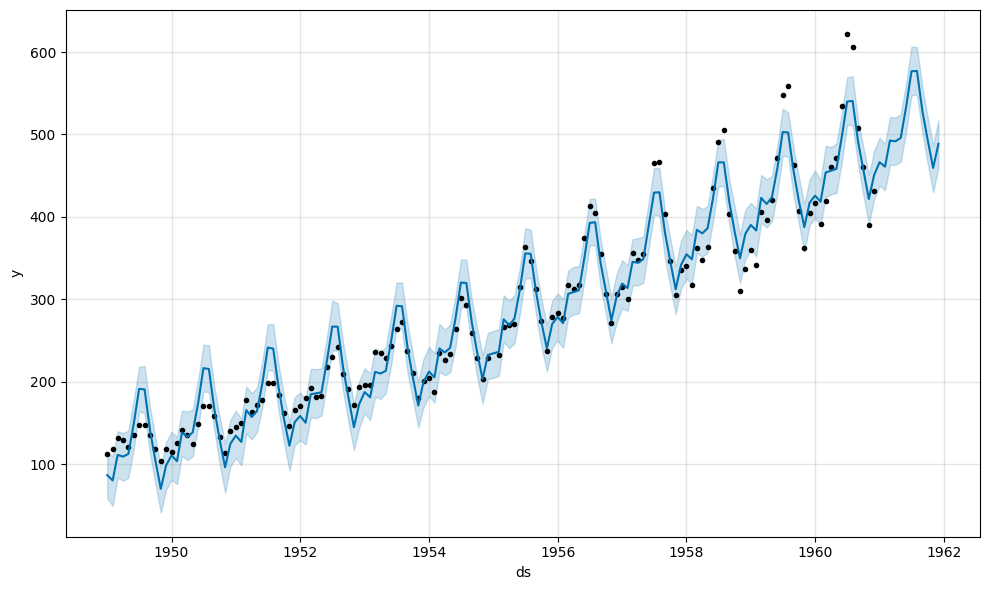

In [106]:
fig=m4.plot(forecast)
